In [25]:
%load_ext autoreload
%autoreload 2

In [1]:
#Basic stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [29]:
from MTase.ActivityClassifier import ActivityClassifier, AverageRF
from MTase.utils import train_test_split_data, evaluate_classifier_model

In [17]:
from tqdm import tqdm_notebook, tqdm_pandas
from tqdm.auto import tqdm
tqdm.pandas(tqdm_notebook)

In [102]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.rdmolops import RDKFingerprint

In [7]:
my_model = AverageRF(model_type='classifier', n_forests=5)

In [100]:
#active = pd.read_pickle("./active.pkl.bz2")
#inactive = pd.read_pickle("./inactive.pkl.bz2")
inconclusive = pd.read_pickle("./inconclusive.pkl.bz2")
#active['ActiveBit']   = True
#inactive['ActiveBit'] = False
#columns = ['PUBCHEM_SID', 'RDKit Fingerprints', 'ActiveBit']
#data = pd.concat([active.filter(columns,axis=1),inactive],
#                 axis=0,join='inner', ignore_index=True)
#X_data  = np.array(list(data['RDKit Fingerprints'])).astype(int)
#y_data = data['ActiveBit'].values
#X_train, X_test, y_train, y_test = train_test_split_data(X_data, y_data, rate_inactives=0.90)

In [9]:
my_model.fit(X_train,y_train)

C:\Users\gmseabra\Miniconda3\envs\unc\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gmseabra\Miniconda3\envs\unc\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gmseabra\Miniconda3\envs\unc\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gmseabra\Miniconda3\envs\unc\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gmseabra\Minico

In [183]:
predictor = ActivityClassifier(my_model,'rdkit')
test = inconclusive[:10]
test["ActiveBit"] = test["SMILES"].progress_apply(predictor.predict)

C:\Users\gmseabra\Miniconda3\envs\unc\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [184]:
test.ActiveBit

1510    0.26
1763    0.14
2164    0.60
3318    0.22
3418    0.14
3444    0.30
3599    0.20
3600    0.28
3710    0.18
3853    0.10
Name: ActiveBit, dtype: float64

In [185]:
test = predictor.predict(test.SMILES.values)

In [151]:
test_smiles = "CC1=C(SC=C1)/C=C\2/C(=O)C3=C(O2)C=C(C=C3)O"
mol = Chem.MolFromSmiles(test_smiles)
if mol is None:
    print("Mol is None!!")
fp = RDKFingerprint(mol)
fp = np.array(list(map(int,fp.ToBitString())))
fp

Mol is None!!


ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.RDKFingerprint(NoneType)
did not match C++ signature:
    RDKFingerprint(class RDKit::ROMol mol, unsigned int minPath=1, unsigned int maxPath=7, unsigned int fpSize=2048, unsigned int nBitsPerHash=2, bool useHs=True, double tgtDensity=0.0, unsigned int minSize=128, bool branchedPaths=True, bool useBondOrder=True, class boost::python::api::object atomInvariants=0, class boost::python::api::object fromAtoms=0, class boost::python::api::object atomBits=None, class boost::python::api::object bitInfo=None)

In [136]:
my_model.predict_proba([fp])

array([[0.86, 0.14]])

In [179]:
test = predictor.classify_one(test_smiles)

In [113]:
test.SMILES.head()

1510                                        CC1=C(SC=C1)/C=C\2/C(=O)C3=C(O2)C=C(C=C3)O
1763    CC(C)OC1=CC=CC=C1/C=C\2/C(=O)N(/C(=C(/C#N)\C(=O)NC3=CC=C(C=C3)C(=O)O)/S2)CCCOC
2164                C1OC2=C(O1)C=C(C=C2)/C=C\3/C(=O)N(C(=S)S3)CCC(=O)N(CCO)C4=CC=CC=C4
3318    CCN\1C2=CC=CC=C2C(/C1=C\C=C\C3=[N+](C4=CC=CC=C4C3(C)C)CC)(C)C.[O-]Cl(=O)(=O)=O
3418                                     C1=CSC(=C1)C=C(C#N)C2=NC(=CS2)C3=CC=C(C=C3)Cl
Name: SMILES, dtype: object

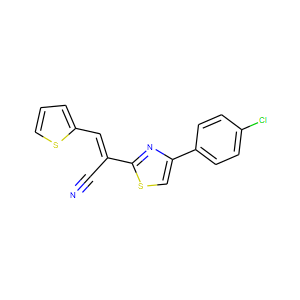

In [118]:
Draw.MolToImage(Chem.MolFromSmiles("C1=CSC(=C1)C=C(C#N)C2=NC(=CS2)C3=CC=C(C=C3)Cl"))

In [104]:
active.SMILES.head()

0    COC1=CC(=O)C(=C(C1=O)CCCCCCC/C=C/CCCCCCCC2=C(C(=O)C=C(C2=O)OC)O)O
1                    C1=CC2=C(C=C1[O-])OC3=CC(=O)C=CC3=[N+]2[O-].[Na+]
2        CC1=CC=C(O1)C(=O)C2=C(C(=O)N(C2C3=CC(=CC=C3)OCC=C)C4=NC=CS4)O
3                                  CC1=NC2=C(C=C1)C(=O)C(=C(C2=O)Br)OC
4                                     COC1=C(C(=O)C2=C(C1=O)C=CC=N2)Br
Name: SMILES, dtype: object

In [220]:
np.array(test) > 0.2

array([ True, False,  True,  True, False,  True, False,  True, False,
       False])

In [190]:
x = np.array(test)

In [219]:
x[x>=0.2]

array([0.26, 0.6 , 0.22, 0.3 , 0.28])

In [192]:
y = 10*x

In [203]:
y[x>=0.9]

array([], dtype=float64)

In [197]:
np.array(test)[test > 0.2]

TypeError: '>' not supported between instances of 'list' and 'float'

In [200]:
len(x[x>=0.2])

5

In [211]:
smi = active.SMILES.head(10).values.tolist()

In [212]:
smi

['COC1=CC(=O)C(=C(C1=O)CCCCCCC/C=C/CCCCCCCC2=C(C(=O)C=C(C2=O)OC)O)O',
 'C1=CC2=C(C=C1[O-])OC3=CC(=O)C=CC3=[N+]2[O-].[Na+]',
 'CC1=CC=C(O1)C(=O)C2=C(C(=O)N(C2C3=CC(=CC=C3)OCC=C)C4=NC=CS4)O',
 'CC1=NC2=C(C=C1)C(=O)C(=C(C2=O)Br)OC',
 'COC1=C(C(=O)C2=C(C1=O)C=CC=N2)Br',
 'C1=CC=C(C=C1)C(=O)NC2=C(C(=O)C(=C(C2=O)Cl)NC(=O)C3=CC=CC=C3)Cl',
 'CCC(=O)NC1=C(C(=O)C(=C(C1=O)Cl)NC(=O)CC)Cl',
 'COC1=C2C(=C(C=C1)OC)C(=O)C(=C(C2=O)Cl)Cl',
 'C1=CC=C(C=C1)OC2=C(C(=O)C3=CC=CC=C3C2=O)Cl',
 'C1=CC=C(C(=C1)C2=C3C=CC(=O)C(=C3OC4=C2C=CC(=C4O)O)O)S(=O)(=O)O']

In [214]:
smi = np.array(smi)

In [217]:
sel = smi[x>=.2].tolist()

In [240]:
x.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [249]:
sel = []
[sel.append('<'+s+'>') for s in smi[x>=.2]]
#for s in smi[x>=.2]:
#    s = '<'+s+'>'
#    sel.append(s)
sel

['<COC1=CC(=O)C(=C(C1=O)CCCCCCC/C=C/CCCCCCCC2=C(C(=O)C=C(C2=O)OC)O)O>',
 '<CC1=CC=C(O1)C(=O)C2=C(C(=O)N(C2C3=CC(=CC=C3)OCC=C)C4=NC=CS4)O>',
 '<CC1=NC2=C(C=C1)C(=O)C(=C(C2=O)Br)OC>',
 '<C1=CC=C(C=C1)C(=O)NC2=C(C(=O)C(=C(C2=O)Cl)NC(=O)C3=CC=CC=C3)Cl>',
 '<COC1=C2C(=C(C=C1)OC)C(=O)C(=C(C2=O)Cl)Cl>']

In [230]:
for s in sel:
    print(s)

<generator object <genexpr> at 0x0000016957B3E8B8>


In [250]:
sel

['<COC1=CC(=O)C(=C(C1=O)CCCCCCC/C=C/CCCCCCCC2=C(C(=O)C=C(C2=O)OC)O)O>',
 '<CC1=CC=C(O1)C(=O)C2=C(C(=O)N(C2C3=CC(=CC=C3)OCC=C)C4=NC=CS4)O>',
 '<CC1=NC2=C(C=C1)C(=O)C(=C(C2=O)Br)OC>',
 '<C1=CC=C(C=C1)C(=O)NC2=C(C(=O)C(=C(C2=O)Cl)NC(=O)C3=CC=CC=C3)Cl>',
 '<COC1=C2C(=C(C=C1)OC)C(=O)C(=C(C2=O)Cl)Cl>']

In [253]:
for s,smi in enumerate(sel):
    print(sel[s])

<COC1=CC(=O)C(=C(C1=O)CCCCCCC/C=C/CCCCCCCC2=C(C(=O)C=C(C2=O)OC)O)O>
<CC1=CC=C(O1)C(=O)C2=C(C(=O)N(C2C3=CC(=CC=C3)OCC=C)C4=NC=CS4)O>
<CC1=NC2=C(C=C1)C(=O)C(=C(C2=O)Br)OC>
<C1=CC=C(C=C1)C(=O)NC2=C(C(=O)C(=C(C2=O)Cl)NC(=O)C3=CC=CC=C3)Cl>
<COC1=C2C(=C(C=C1)OC)C(=O)C(=C(C2=O)Cl)Cl>


In [254]:
tuple_list = []
for i in range(10):
    tuple_list.append((i, 10*i))

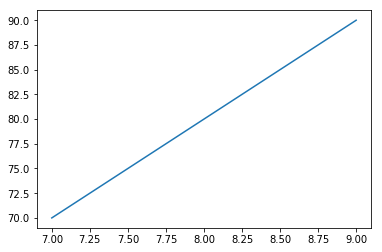

In [298]:
x,y = zip(*tuple_list)
plt.plot(x,y)
lines = []
for line in lines:
    plt.axvline(x=line)

In [261]:
tuple_list[-3:]

[(7, 70), (8, 80), (9, 90)]

In [262]:
tuple_list = tuple_list[-3:]
tuple_list

[(7, 70), (8, 80), (9, 90)]

In [263]:
len(tuple_list)

3

In [272]:
t = 0.12588840000000004
print(f"Threshold = {t:.5%}")

Threshold = 12.58884%


In [278]:
x = np.array([1,2,3,-1,3,4,-1,43,524355,-1])

In [284]:
l = []
l.append(sum (x == -1))
l

[3]

In [283]:
x.len()

AttributeError: 'numpy.ndarray' object has no attribute 'len'

In [285]:
min(1.0,0.5)

0.5

In [293]:
min(x[8]/10000, 3435)

52.4355

In [300]:
x = 4

In [307]:
if (2 < x < 8 ):
    print("YESY")

YESY
